In [1]:
import numpy as np
import cv2
from skimage.filters import threshold_multiotsu
from skimage.restoration import denoise_tv_chambolle
import matplotlib.pyplot as plt

### Segmentação manual e automática (OTSU)

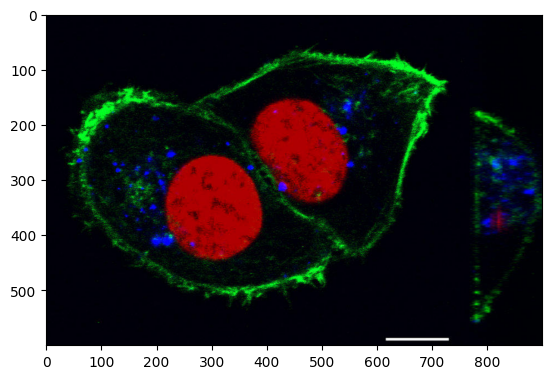

In [16]:
#Video Playlist: https://www.youtube.com/playlist?list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG
img = cv2.imread("images/cancer_cell.jpg")
plt.imshow(img)

In [17]:
#cv2 imports in BGR
blue_channel = img[:,:,2]
green_channel = img[:,:,1]
red_channel = img[:,:,0]

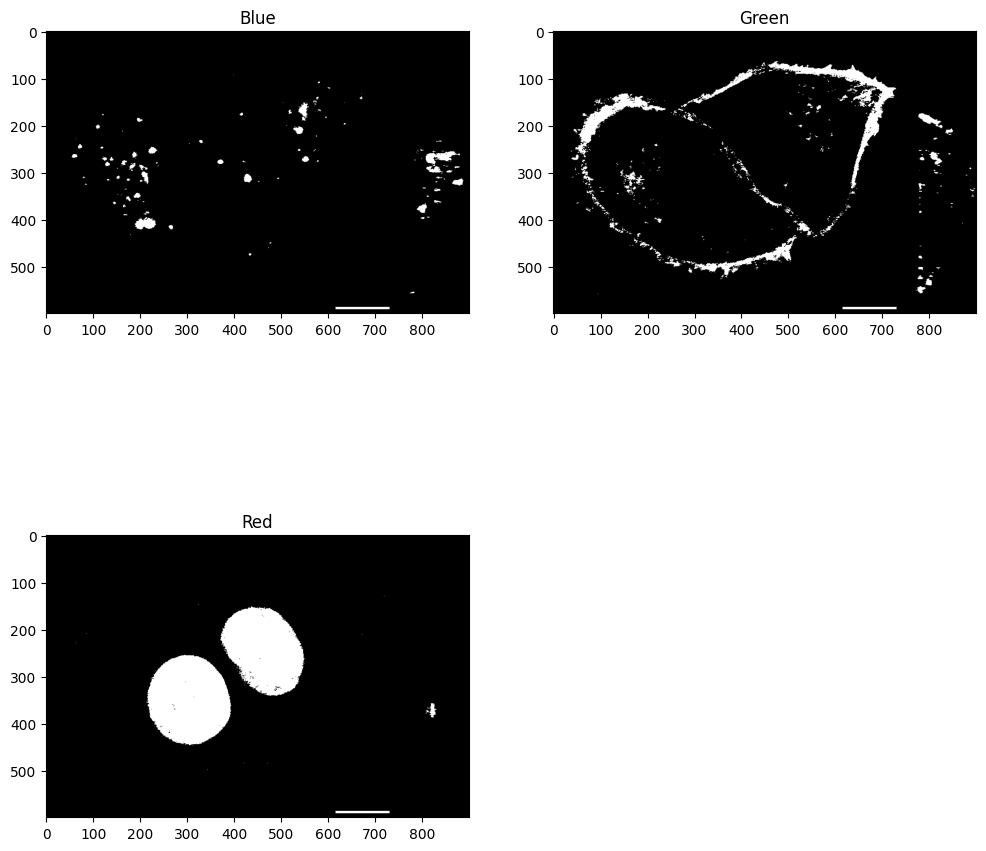

In [18]:
############# Segmentação manual ##########################
manual_ret_red, manual_thresh_red = cv2.threshold(red_channel, 60, 255, cv2.THRESH_BINARY) #cell nuclei
manual_ret_green, manual_thresh_green = cv2.threshold(green_channel, 70, 255, cv2.THRESH_BINARY) #cell membrane
manual_ret_blue, manual_thresh_blue = cv2.threshold(blue_channel, 80, 255, cv2.THRESH_BINARY) #cell marker
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(manual_thresh_blue, cmap='gray')
ax1.title.set_text('Blue')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(manual_thresh_green, cmap='gray')
ax2.title.set_text('Green')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(manual_thresh_red, cmap='gray')
ax3.title.set_text('Red')
plt.show()

####################################################################

threshold values of B: 93.0, G: 79.0, R: 80.0


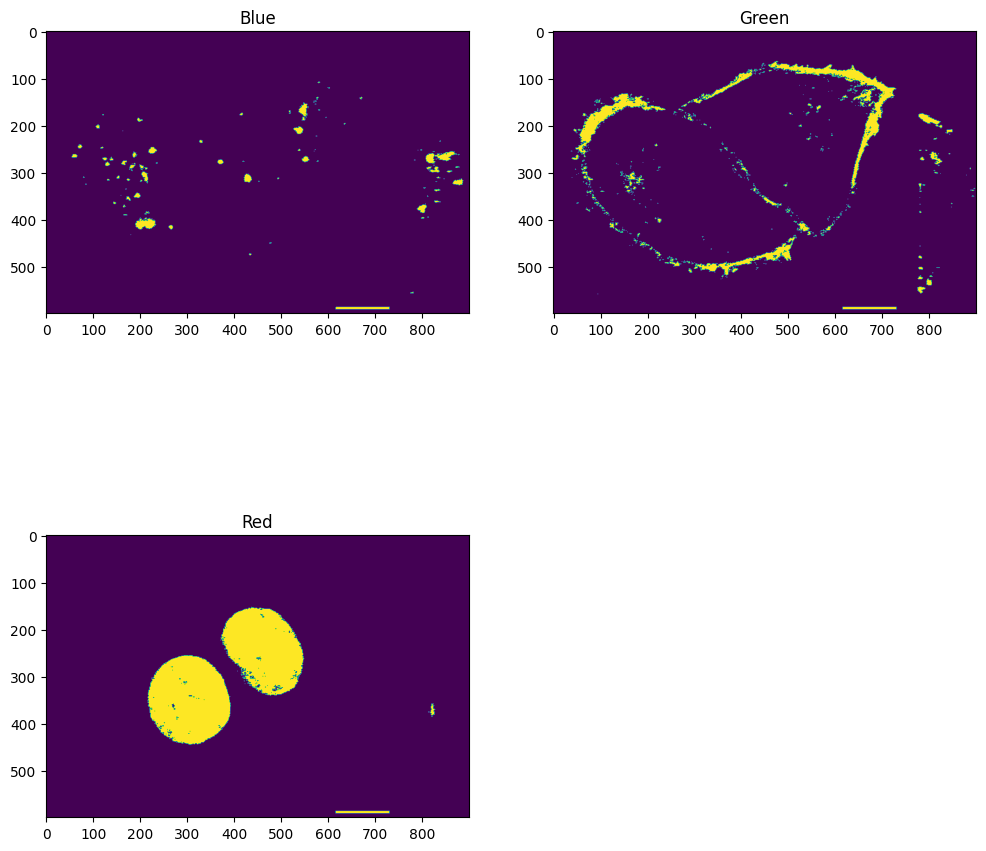

In [19]:
############# Segmentação automática (OTSU) ##########################
ret_blue, thresh_blue = cv2.threshold(blue_channel,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret_green, thresh_green = cv2.threshold(green_channel,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret_red, thresh_red = cv2.threshold(red_channel,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(f'threshold values of B: {ret_blue}, G: {ret_green}, R: {ret_red}')

regions_blue=np.digitize(blue_channel, bins=np.array([ret_blue]))
regions_green=np.digitize(green_channel, bins=np.array([ret_green]))
regions_red=np.digitize(red_channel, bins=np.array([ret_red]))

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(regions_blue)
ax1.title.set_text('Blue')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(regions_green)
ax2.title.set_text('Green')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(regions_red)
ax3.title.set_text('Red')
plt.show()

####################################################################

### Segmentação de imagem de múltiplos canais e operadores morfológicos

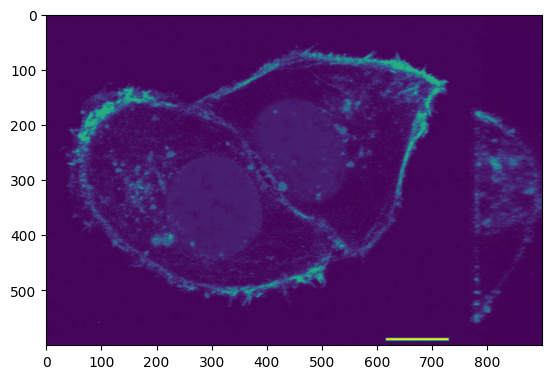

In [20]:
color_img = cv2.imread("images/cancer_cell.jpg")
img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

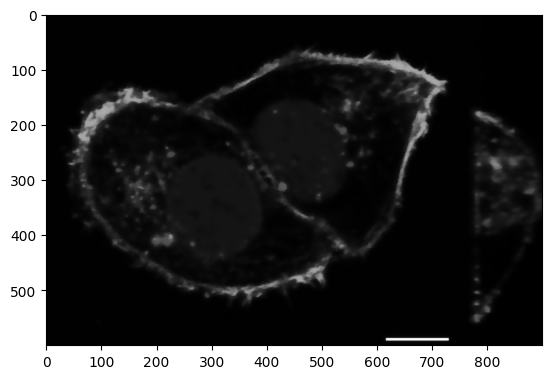

In [21]:
denoised_img = denoise_tv_chambolle(img, weight=0.1, eps=0.0002, max_num_iter=200)
plt.imshow(denoised_img, cmap='gray')

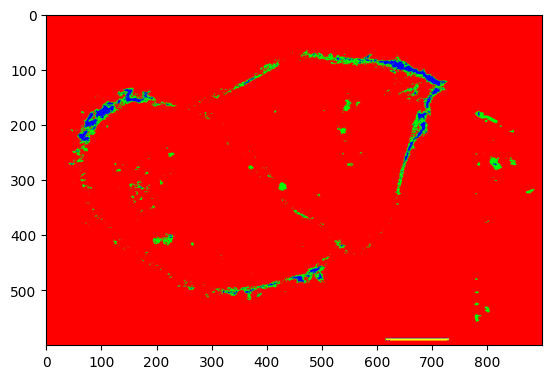

In [22]:
##################MANUAL########################
#Can perform manual segmentation but auto works fine
region1 = (img >= 0) & (img <75)
region2 = (img >= 75) & (img <140)
region3 = (img >= 140) & (img <200)
region4 = (img >= 200) & (img <=255)
all_regions = np.zeros((img.shape[0], img.shape[1], 3)) #Create 3 channel blank image of same size as original
all_regions[region1] = (1,0,0)
all_regions[region2] = (0,1,0)
all_regions[region3] = (0,0,1)
all_regions[region4] = (1,1,0)
plt.imshow(all_regions)
##############################################

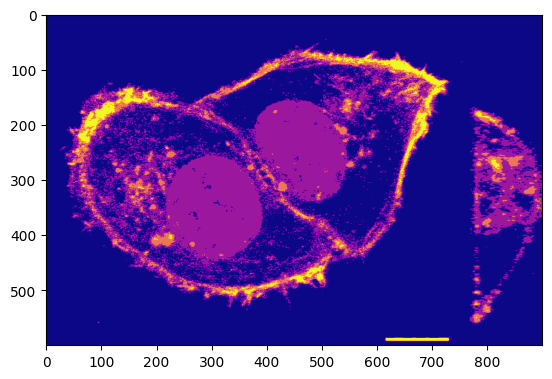

In [23]:
####AUTO###########################
# Apply multi-Otsu threshold 
thresholds = threshold_multiotsu(img, classes=4)

# Digitize (segment) original image into multiple classes.
#np.digitize assign values 0, 1, 2, 3, ... to pixels in each class.
regions = np.digitize(img, bins=thresholds)
plt.imshow(regions, cmap='plasma')